# Linear Regression

In this part of this exercise, you will implement linear regression with one
variable to predict profits for a food truck. Suppose you are the CEO of a
restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
profits and populations from the cities.

Let's start by importing all the libraries we'll need for our analysis.

In [1]:
:load PathToProject/CourseraMachineLearning/src/Util.hs
import qualified Graphics.Gnuplot.Advanced as GP

import qualified Graphics.Gnuplot.Graph as Graph

import qualified Graphics.Gnuplot.Plot.ThreeDimensional as Plot3D
import qualified Graphics.Gnuplot.Graph.ThreeDimensional as Graph3D

import qualified Graphics.Gnuplot.Plot.TwoDimensional as Plot2D
import qualified Graphics.Gnuplot.Graph.TwoDimensional as Graph2D
import qualified Graphics.Gnuplot.Terminal.Default as DefaultTerm
import Graphics.Gnuplot.Plot.TwoDimensional (linearScale, )

import Numeric.LinearAlgebra
import Prelude hiding ((<>))
import System.Directory
import System.IO.Unsafe (unsafePerformIO)
import Util

import IHaskell.Display.Gnuplot
import qualified IHaskell.Display as D

## Plotting the data

Before starting on any task, it is often useful to understand the data by
visualizing it. For this dataset, you can use a scatter plot to visualize the
data, since it has only two properties to plot (profit and population). (Many
other problems that you will encounter in real life are multi-dimensional and
can’t be plotted on a 2-d plot.)

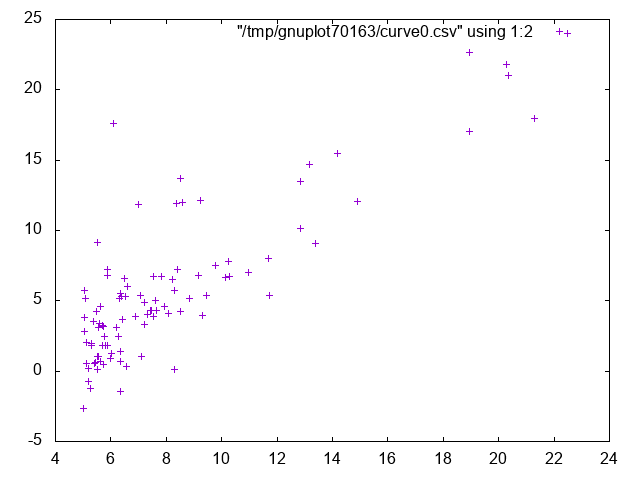

In [2]:
home <- getHomeDirectory
-- change this before running.
let dataOne = home ++ "/code/haskell/CourseraMachineLearning/app/ex1data1.txt"
[x'', y''] <- fmap toColumns (loadMatrix dataOne)
x' = x''
y' = y''
D.Display [unsafePerformIO $ graphDataPNG2P (plotPoints (toList x') (toList y'))]

## Gradient Descent

In this part, you will fit the linear regression parameters θ to our dataset
using gradient descent. As you perform gradient descent to learn minimize the cost function J(θ),
it is helpful to monitor the convergence by computing the cost. So the firs thing we'll do is define a cost function to help us minimise our gradient descent.

In [3]:
computeCost :: Matrix Double -- Features
            -> Matrix Double -- Labels
            -> Matrix Double -- Theta
            -> Double
computeCost x y theta = (sumElements squareDifference) / (2.0 * m)
  where m = fromIntegral ((fst . size) y)
        h = x <> theta
        squareDifference = (h - y) ^ 2

### Computing the cost

Once you have completed the function, the next step is to run
computeCost once using θ initialized to zeros. You should expect to see a cost of 32.07.

In [4]:
-- Part 3: Cost and Gradient Descent
m = size y'
x = ones m 1 ||| reshape 1 x'
y = asColumn y'
xPoints = toList x'
yPoints = toList y'
theta = zeros 2 1
iterations = 1500
alpha = 0.01

j = computeCost x y theta
putStrLn ("With theta = [0, 0]\n Cost computed = " ++ show j)
putStrLn "Expected cost value (approx) 32.07"
k = computeCost x y (asColumn $ 2 |> [-1, 2])
putStrLn ("With theta = [-1, 2]\n Cost computed = " ++ show k)
putStrLn "Expected cost value (approx) 54.24"

With theta = [0, 0]
 Cost computed = 32.072733877455654

Expected cost value (approx) 32.07

With theta = [-1, 2]
 Cost computed = 54.24245508201238

Expected cost value (approx) 54.24

### Implementing gradient descent

Write out gradient descent.

In [5]:
-- A simple gradient descent algorithm that specifies an arbitrary number of iterations.
gradientDescent :: Matrix Double -- Features
                -> Matrix Double -- Labels
                -> Matrix Double -- Parameters
                -> Double        -- Learning Rate
                -> Int           -- Number of iterations
                -> ([Double], Matrix Double)
gradientDescent x y theta alpha numIters = gradientDescent' x y theta alpha numIters []

gradientDescent' :: Matrix Double -- Features
                 -> Matrix Double -- Labels
                 -> Matrix Double -- Parameters
                 -> Double        -- Learning Rate
                 -> Int           -- Number of Iterations
                 -> [Double]      -- Cost history
                 -> ([Double], Matrix Double)
gradientDescent' x y theta alpha iterations hist
  | iterations > 0   = gradientDescent' x y theta' alpha (iterations - 1) hist'
  | otherwise        = (hist' , theta)
    where cost  = computeCost x y theta
          hist' = cost : hist
          theta' = theta - step
          step = (scalar alpha) * ((tr' x) <> ((x <> theta) - y)) / (scalar m)
          m = fromIntegral ((fst . size) y)

Theta found by gradient descent: (2><1)
 [ -3.63029143940436
 , 1.166362350335582 ]

Expected theta values (approx)

 -3.6303
  1.1664

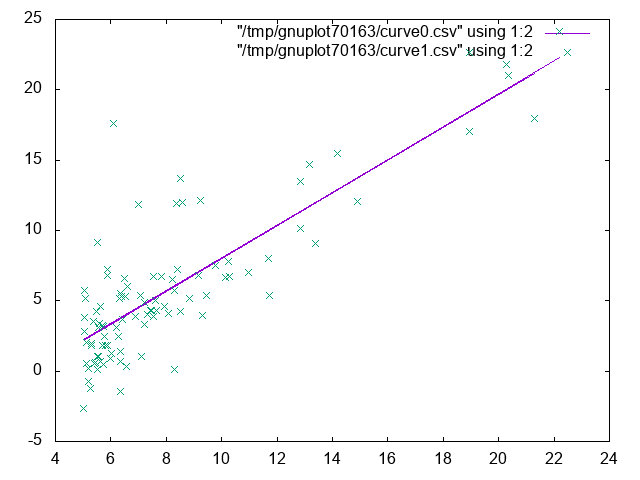

In [6]:
(costHist, thetaOpt) = gradientDescent  x y theta alpha iterations
putStrLn ("Theta found by gradient descent: " ++ show thetaOpt)
putStrLn "Expected theta values (approx)\n"
putStrLn " -3.6303\n  1.1664"
yOptPoints = toList (flatten $ x <> thetaOpt)
D.Display [unsafePerformIO $ graphDataPNG2P (plotLine xPoints yOptPoints `mappend` plotPoints xPoints yPoints)]